# 04 - Linear Regression with Normal Equation

In this notebook, we demonstrate on an artificial data set:

- How to use the normal equation to solve a linear regression model by hand with 2 weight parameters
- Use the LinearRegression class for the same task


Generate some training data (with 100 training instances) from a simple function $y = 4 + 3x$ (with $x = [0, 2.0]$) with some added random noise. Following the convention of machine learning, we call the vector of the x-values (the input values) as X and the y-values (the target values) as y. From this data, we later learn the function, which should be close to the one with generated the data from. The idea is therefore to learn the function above from the given training data.

In [1]:
import numpy as np
np.random.seed(1234)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


Print the first 10 values of X and y.

In [2]:
print('X:\n', X[:10], '\n')
print('y:\n', y[:10])

X:
 [[0.3830389 ]
 [1.24421754]
 [0.87545548]
 [1.57071717]
 [1.55995162]
 [0.54518521]
 [0.55292851]
 [1.60374436]
 [1.91627871]
 [1.75186527]] 

y:
 [[ 5.91648544]
 [ 8.71757247]
 [ 6.89720228]
 [10.1041377 ]
 [ 8.75969716]
 [ 5.23559105]
 [ 4.63093497]
 [ 8.22651485]
 [10.56543005]
 [ 9.17364876]]


Plot the training data with matplotlib. The **"b."** in the plot method defines the style (color and size) the points are plotted. (The characters that can be used to define this style are specified by matplotlib. See the documentation of matplotlib for further details.)

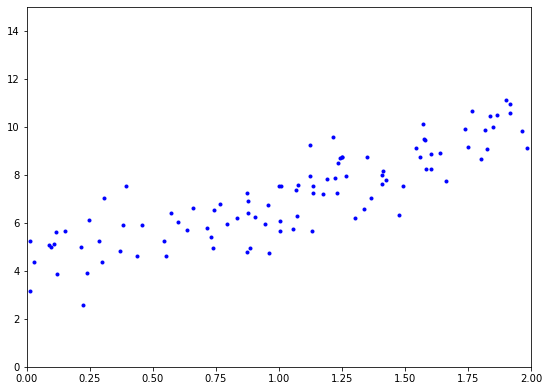

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7, 5))
ax = fig.add_axes((0, 0, 1, 1))
ax.axis([0, 2, 0, 15]) # set axis limits
ax.plot(X, y, "b.")

## Solution with normal equation

Next, we calculate the model parameters theta using the normal equation. But before we can do that in vector form, we need to add a vector of ones to X, so that the ones come before the X values. As you might remember, the ones are multiplied with the bias values. For this purpose, we use the NumPy function **c_**, which does a concatenation, here the vector of ones with our X vector. (Check out how the function does not need parenthesis, but uses the brackets. Python uses a syntactic trick to use operator overloading instead of defining a real function.)

In [4]:
X_b = np.c_[np.ones((100, 1)), X]
print(X_b.shape)
print(X_b[:10,:])

(100, 2)
[[1.         0.3830389 ]
 [1.         1.24421754]
 [1.         0.87545548]
 [1.         1.57071717]
 [1.         1.55995162]
 [1.         0.54518521]
 [1.         0.55292851]
 [1.         1.60374436]
 [1.         1.91627871]
 [1.         1.75186527]]


We use the **@** operator of NumPy that performs a matrix multiplication on NumPy 2D arrays as in the given formula and print the best values for theta.

In [5]:
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.07630632],
       [2.94132381]])

We can now use the theta vector (the learned parameters of out machine learning model) to predict y values from given x values (not forgetting to include a 1 before the actual values that is multiplied with the bias) using the linear weighted combination of theta and x. This linear combination can be implemented with the **dot()** function of NumPy. (No transpose is needed as we provide the x vector as a 1D array.)

In [6]:
X_test = np.array([1.0, 1.375])
print(X_test.shape)
y_test = X_test.dot(theta_best)
print (y_test)

(2,)
[8.12062656]


To plot the model as a straight line, we need the predicted values for x=0.0 and x=2.0 (which is the range of x-values in the training data set). Instead of an X array with two values, we now need to construct a vector with 2 rows and 2 values per row. Since we need to x-values later for plotting, without the bias, we first construct these values, and then concatenate them with the vector of ones (as above). Compare the shapes of the above array of input values and the array of the following cell.

In [7]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
print(X_new_b.shape)
print()
print(X_new_b)
print()
y_predict = X_new_b.dot(theta_best)
print(y_predict)


(2, 2)

[[1. 0.]
 [1. 2.]]

[[4.07630632]
 [9.95895394]]


Now, we are able plot the model as a line on top of the training data as a red line (using the **"r-"** style).

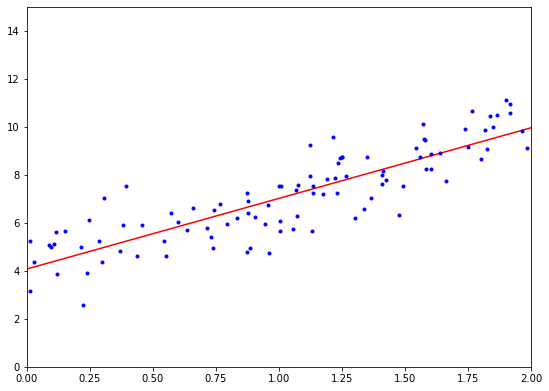

In [8]:
fig = plt.figure(figsize=(7, 5))
ax = fig.add_axes((0, 0, 1, 1))
ax.axis([0, 2, 0, 15]) # set axis limits
ax.plot(X_new, y_predict, "r-")
ax.plot(X, y, "b.")


## Solution with scikit-learn

The library scikit-learn provides a linear regression model to (among others) learn the model parameters of a linear regression and perform predictions. This is encapsulated in the **LinearRegression** class. After importing the respective module, an instance of the LinearRegression class is constructed. Then, the method **fit()** is called on the training data, which consists of the input values X and the target values y (given in vector/array form). Note that no ones need not to be included in the vector X. 

The best fit model parameters are then printed. Note that the coefficients can include more than 1 value depending on the input values (which is visible by the double brackets).

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)

[4.07630632] [[2.94132381]]


Again, predict the values of y for x-values of 0.0 and 2.0 for plotting.

In [10]:
y_predict_sk = lin_reg.predict(X_new)
print(y_predict_sk)

[[4.07630632]
 [9.95895394]]


Plot the model for the Scikit-Learn model.

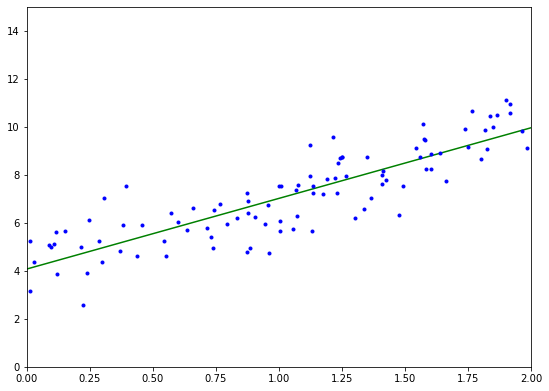

In [11]:
fig = plt.figure(figsize=(7, 5))
ax = fig.add_axes((0, 0, 1, 1))
ax.axis([0, 2, 0, 15])
ax.plot(X_new, y_predict_sk, "g-")
ax.plot(X, y, "b.")


The model parameters (theta) of the two approaches should be exactly the same, as the **fit()** method of **LinearRegression** class also uses the normal equation. However, the scikit-learn library is simple to use (and one does not make a mistake in writing the normal equation) and it offers a few further methods to use that might be helpful.